In [27]:
!pip install seaborn 
!pip install tqdm
!pip install scikit-learn
!pip install gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 177.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 198.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 153.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# load dataset
train_df = pd.read_csv('data/AG News2/preprocessed_ag_news_train.csv')
test_df = pd.read_csv('data/AG News2/preprocessed_ag_news_test.csv')

pd.set_option('display.max_colwidth', None)

In [4]:
train_df

,text,label,processed_text
0,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,wall st bear claw back black reuters reuters shortsellers wall street dwindlingband ultracynics seeing green
1,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,carlyle look toward commercial aerospace reuters reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial play defense industry quietly placedits bet another part market
2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,oil economy cloud stock outlook reuters reuters soaring crude price plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums
3,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2,iraq halt oil export main southern pipeline reuters reuters authority halted oil exportflows main pipeline southern iraq afterintelligence showed rebel militia could strikeinfrastructure oil official said saturday
4,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2,oil price soar alltime record posing new menace u economy afp afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election
...,...,...,...
119518,"Pakistan's Musharraf Says Won't Quit as Army Chief KARACHI (Reuters) - Pakistani President Pervez Musharraf has said he will stay on as army chief, reneging on a pledge to quit the powerful post by the end of the year.",0,pakistan musharraf say quit army chief karachi reuters pakistani president pervez musharraf said stay army chief reneging pledge quit powerful post end year
119519,"Renteria signing a top-shelf deal Red Sox general manager Theo Epstein acknowledged Edgar Renteria was more a luxury for the 2005 Red Sox than a necessity. But there's nothing wrong with getting the keys to a BMW, and that's what the four-time All-Star and two-time Gold Glover is in the eyes of the Red Sox.",1,renteria signing topshelf deal red sox general manager theo epstein acknowledged edgar renteria luxury red sox necessity nothing wrong getting key bmw fourtime allstar twotime gold glover eye red sox
119520,"Saban not going to Dolphins yet The Miami Dolphins will put their courtship of LSU coach Nick Saban on hold to comply with the NFL's hiring policy by interviewing at least one minority candidate, a team source told The Associated Press last night.",1,saban going dolphin yet miami dolphin put courtship lsu coach nick saban hold comply nfls hiring policy interviewing least one minority candidate team source told associated press last night
119521,"Today's NFL games PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: Steelers by 10. Records: Steelers 12-1, Giants 5-8. Vs. spread: Steelers 10-1-2, Giants 5-8. Series: Giants lead, 43-27-3. Comments: Think the Giants knew Ben Roethlisberger was available on draft day when they broke the bank and traded for Eli Manning? . . . All Big Ben has done this year is complete ...",1,today nfl game pittsburgh ny giant time pm line steelers record steelers giant v spread steelers giant series giant lead comment think giant k

In [5]:
test_df

,text,label,processed_text
0,Fears for T N pension after talks Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.,2,fear n pension talk union representing worker turner newall say disappointed talk stricken parent firm federal mogul
1,"The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.",3,race second private team set launch date human spaceflight spacecom spacecom toronto canada secondteam rocketeers competing million ansari x prize contest forprivately funded suborbital space flight officially announced firstlaunch date manned rocket
2,"Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.",3,ky company win grant study peptide ap ap company founded chemistry researcher university louisville grant develop method producing better peptide short chain amino acid building block protein
3,"Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.",3,prediction unit help forecast wildfire ap ap barely dawn mike fitzpatrick start shift blur colorful map figure endless chart already know day bring lightning strike place expects wind pick moist place dry flame roar
4,"Calif. Aims to Limit Farm-Related Smog (AP) AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.",3,calif aim limit farmrelated smog ap ap southern california smogfighting agency went emission bovine variety friday adopting nation first rule reduce air pollution dairy cow manure
...,...,...,...
7594,"Around the world Ukrainian presidential candidate Viktor Yushchenko was poisoned with the most harmful known dioxin, which is contained in Agent Orange, a scientist who analyzed his blood said Friday.",0,around world ukrainian presidential candidate viktor yushchenko poisoned harmful known dioxin contained agent orange scientist analyzed blood said friday
7595,"Void is filled with Clement With the supply of attractive pitching options dwindling daily -- they lost Pedro Martinez to the Mets, missed on Tim Hudson, and are resigned to Randy Johnson becoming a Yankee -- the Red Sox struck again last night, coming to terms with free agent Matt Clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...",1,void filled clement supply attractive pitching option dwindling daily lost pedro martinez mets missed tim hudson resigned randy johnson becoming yankee red sox struck last night coming term free agent matt clement threeyear deal pay righthander neighborhood
7596,"Martinez leaves bitter Like Roger Clemens did almost exactly eight years earlier, Pedro Martinez has left the Red Sox apparently bitter about the way he was treated by management.",1,martinez leaf bitter like roger clemens almost exactly eight year earlier pedro martinez left red sox apparently bitter way treated management
7597,5 of arthritis patients in Singapore take Bextra or Celebrex &lt;b&gt;...&lt;/b&gt; SINGAPORE : Doctors in the United States have warned that painkillers Bextra and Celebrex may be linked to major cardiovascular problems and should not be prescribed.,2,arthritis patient singapore take bextra celebrex bb singapore doctor united state warned pain

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119523 entries, 0 to 119522
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            119523 non-null  object
 1   label           119523 non-null  int64 
 2   processed_text  119523 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7599 entries, 0 to 7598
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            7599 non-null   object
 1   label           7599 non-null   int64 
 2   processed_text  7599 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


In [8]:
# dataset label
train_df['label'].value_counts()

label
1    29920
0    29914
2    29859
3    29830
Name: count, dtype: int64

In [9]:
test_df['label'].value_counts()

label
3    1900
1    1900
0    1900
2    1899
Name: count, dtype: int64

In [11]:
# train and test dataset
train_data = train_df["processed_text"].values
train_labels = train_df["label"].values
test_data = test_df["processed_text"].values
test_labels = test_df["label"].values

训练数据特征矩阵的形状: (119523, 5000)
特征名称的一部分: ['aaron' 'abandon' 'abandoned' 'abbas' 'abbey' 'abc' 'abducted' 'abdullah'
 'ability' 'able']
Bag of Words - Accuracy: 0.9073562310830372
Bag of Words - Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1900
           1       0.95      0.98      0.96      1900
           2       0.87      0.87      0.87      1899
           3       0.88      0.88      0.88      1900

    accuracy                           0.91      7599
   macro avg       0.91      0.91      0.91      7599
weighted avg       0.91      0.91      0.91      7599



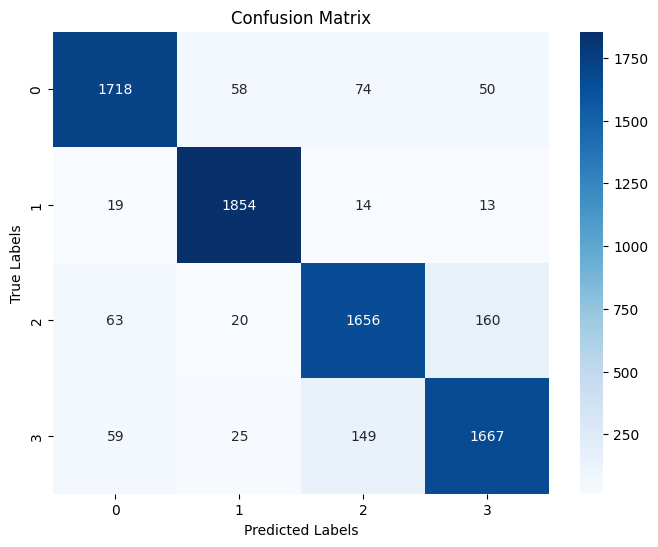

In [21]:
# 使用 TF-IDF 提取特征
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(train_df['processed_text'])
X_test_vec = vectorizer.transform(test_df['processed_text'])

# 查看训练数据的特征向量矩阵的形状
print("训练数据特征矩阵的形状:", X_train_vec.shape)

# 查看特征名称
feature_names = vectorizer.get_feature_names_out()
print("特征名称的一部分:", feature_names[:10])  # 显示前 10 个特征名称

# 逻辑回归模型
model = LogisticRegression(max_iter=100)
model.fit(X_train_vec, train_labels)

# 预测与评估
y_pred = model.predict(X_test_vec)
print("Bag of Words - Accuracy:", accuracy_score(test_labels, y_pred))
print("Bag of Words - Classification Report:\n", classification_report(test_labels, y_pred))

# 计算混淆矩阵
conf_matrix = confusion_matrix(test_labels, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

训练数据特征矩阵的形状: (119523, 5000)
特征名称的一部分: ['aaron' 'abandon' 'abandoned' 'abbas' 'abbey' 'abc' 'abducted' 'abdullah'
 'ability' 'able']
Bag of Words - Accuracy: 0.896828530069746
Bag of Words - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1900
           1       0.95      0.97      0.96      1900
           2       0.86      0.86      0.86      1899
           3       0.87      0.87      0.87      1900

    accuracy                           0.90      7599
   macro avg       0.90      0.90      0.90      7599
weighted avg       0.90      0.90      0.90      7599



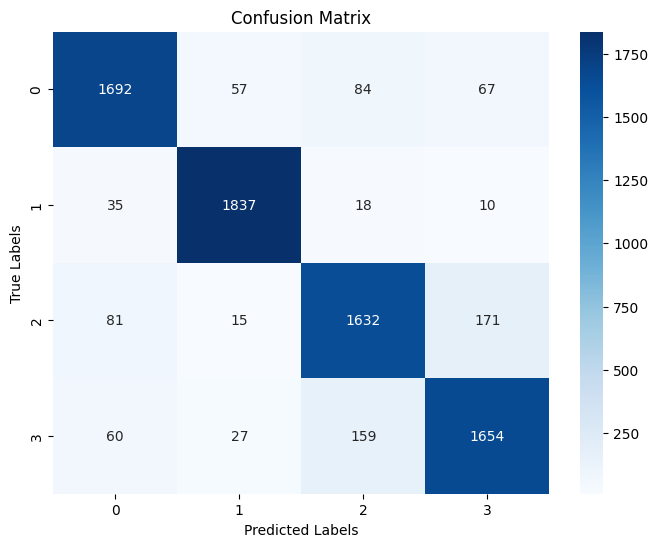

In [24]:
# 使用 Bag of Words 提取特征
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(train_df['processed_text'])
X_test_vec = vectorizer.transform(test_df['processed_text'])

# 查看训练数据的特征向量矩阵的形状
print("训练数据特征矩阵的形状:", X_train_vec.shape)

# 查看特征名称
feature_names = vectorizer.get_feature_names_out()
print("特征名称的一部分:", feature_names[:10])  # 显示前 10 个特征名称

# 逻辑回归模型
model = LogisticRegression(max_iter=100)
model.fit(X_train_vec, train_labels)

# 预测与评估
y_pred = model.predict(X_test_vec)
print("Bag of Words - Accuracy:", accuracy_score(test_labels, y_pred))
print("Bag of Words - Classification Report:\n", classification_report(test_labels, y_pred))

# 计算混淆矩阵
conf_matrix = confusion_matrix(test_labels, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


训练数据特征矩阵的形状: (119523, 5000)
特征名称的一部分: ['aaron' 'abandon' 'abandoned' 'abbas' 'abbey' 'abc' 'abducted' 'ability'
 'able' 'aboard']
N-gram - Accuracy: 0.9001184366363996
N-gram - Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1900
           1       0.95      0.97      0.96      1900
           2       0.87      0.86      0.86      1899
           3       0.87      0.88      0.87      1900

    accuracy                           0.90      7599
   macro avg       0.90      0.90      0.90      7599
weighted avg       0.90      0.90      0.90      7599



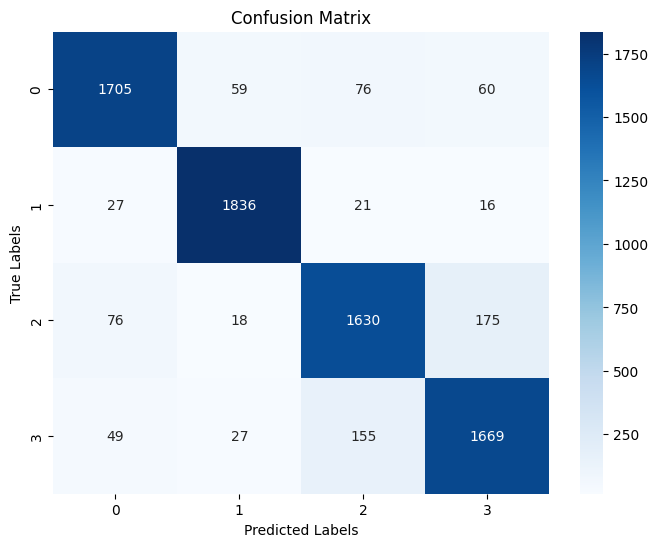

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 N-gram 提取特征 (例如 bi-gram)
vectorizer = CountVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))  # 使用 uni-gram 和 bi-gram
X_train_vec = vectorizer.fit_transform(train_df['processed_text'])
X_test_vec = vectorizer.transform(test_df['processed_text'])

# 查看训练数据的特征向量矩阵的形状
print("训练数据特征矩阵的形状:", X_train_vec.shape)

# 查看特征名称
feature_names = vectorizer.get_feature_names_out()
print("特征名称的一部分:", feature_names[:10])  # 显示前 10 个特征名称

# 逻辑回归模型
model = LogisticRegression(max_iter=100)
model.fit(X_train_vec, train_labels)

# 预测与评估
y_pred = model.predict(X_test_vec)
print("N-gram - Accuracy:", accuracy_score(test_labels, y_pred))
print("N-gram - Classification Report:\n", classification_report(test_labels, y_pred))

# 计算混淆矩阵
conf_matrix = confusion_matrix(test_labels, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


CBOW - Accuracy: 0.8795894196604817
CBOW - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1900
           1       0.94      0.96      0.95      1900
           2       0.85      0.84      0.84      1899
           3       0.85      0.84      0.84      1900

    accuracy                           0.88      7599
   macro avg       0.88      0.88      0.88      7599
weighted avg       0.88      0.88      0.88      7599



/environment/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


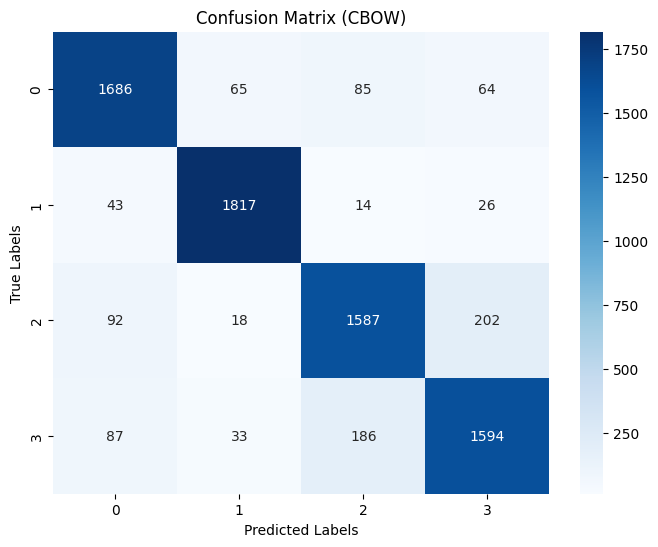

Skip-gram - Accuracy: 0.8906435057244374
Skip-gram - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1900
           1       0.95      0.97      0.96      1900
           2       0.85      0.85      0.85      1899
           3       0.86      0.86      0.86      1900

    accuracy                           0.89      7599
   macro avg       0.89      0.89      0.89      7599
weighted avg       0.89      0.89      0.89      7599



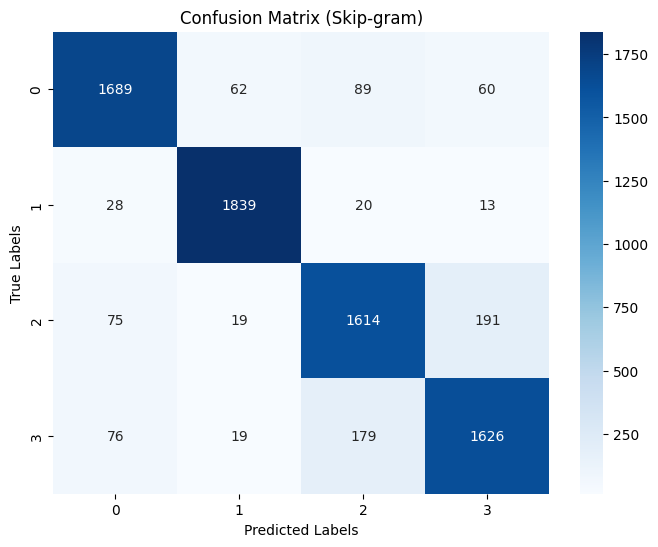

In [30]:
from gensim.models import Word2Vec

# 假设我们有一些预处理后的分词文本数据
train_sentences = [text.split() for text in train_df['processed_text']]
test_sentences = [text.split() for text in test_df['processed_text']]

# 使用 Word2Vec 训练 CBOW 模型（sg=0 表示 CBOW）
cbow_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# 使用 Word2Vec 训练 Skip-gram 模型（sg=1 表示 Skip-gram）
skipgram_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# 函数：将每个句子转换为词向量的平均值
def get_avg_word2vec(tokens, model, vector_size):
    feature_vec = np.zeros((vector_size,), dtype='float32')
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

# 将训练集和测试集的文本转换为 CBOW 模型的词向量
X_train_cbow = np.array([get_avg_word2vec(sentence, cbow_model, 100) for sentence in train_sentences])
X_test_cbow = np.array([get_avg_word2vec(sentence, cbow_model, 100) for sentence in test_sentences])

# 使用逻辑回归训练并评估 CBOW 模型
model_cbow = LogisticRegression(max_iter=100)
model_cbow.fit(X_train_cbow, train_labels)
y_pred_cbow = model_cbow.predict(X_test_cbow)

print("CBOW - Accuracy:", accuracy_score(test_labels, y_pred_cbow))
print("CBOW - Classification Report:\n", classification_report(test_labels, y_pred_cbow))

# 可视化 CBOW 模型的混淆矩阵
conf_matrix_cbow = confusion_matrix(test_labels, y_pred_cbow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cbow, annot=True, fmt='d', cmap='Blues', xticklabels=model_cbow.classes_, yticklabels=model_cbow.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (CBOW)')
plt.show()

# 将训练集和测试集的文本转换为 Skip-gram 模型的词向量
X_train_skipgram = np.array([get_avg_word2vec(sentence, skipgram_model, 100) for sentence in train_sentences])
X_test_skipgram = np.array([get_avg_word2vec(sentence, skipgram_model, 100) for sentence in test_sentences])

# 使用逻辑回归训练并评估 Skip-gram 模型
model_skipgram = LogisticRegression(max_iter=100)
model_skipgram.fit(X_train_skipgram, train_labels)
y_pred_skipgram = model_skipgram.predict(X_test_skipgram)

print("Skip-gram - Accuracy:", accuracy_score(test_labels, y_pred_skipgram))
print("Skip-gram - Classification Report:\n", classification_report(test_labels, y_pred_skipgram))

# 可视化 Skip-gram 模型的混淆矩阵
conf_matrix_skipgram = confusion_matrix(test_labels, y_pred_skipgram)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_skipgram, annot=True, fmt='d', cmap='Blues', xticklabels=model_skipgram.classes_, yticklabels=model_skipgram.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Skip-gram)')
plt.show()
